**Column Details:**
- **State_Name**: Name of the Indian state where the crop was grown.  
- **District_Name**: Name of the district within the state.  
- **Crop_Year**: Year in which the crop was cultivated.  
- **Season**: Growing season of the crop (e.g., Kharif, Rabi, etc.).  
- **Crop**: Name of the crop grown (e.g., rice, wheat, maize, etc.).  
- **Area**: Total area (in hectares) under cultivation for the crop.  
- **Production**: Total production (in metric tons) of the crop in that district/year.  


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/crop_production.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
df.shape

(246091, 7)

In [4]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [5]:
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3730


Since it is difficult to predict the null values for production class we'll drop those rows.

In [6]:
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)

(246091, 7)
(242361, 7)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [8]:
# Let's separate all the numerical and categorical columns
col = (df.dtypes == object)
obj_cols = (col[col] == True).index

col = (df.dtypes != object)
num_cols = (col[col] == True).index

obj_cols, num_cols

(Index(['State_Name', 'District_Name', 'Season', 'Crop'], dtype='object'),
 Index(['Crop_Year', 'Area', 'Production'], dtype='object'))

In [9]:
# Let's check for any inconsistency in object columns along with it's unique values
for col in df.columns:
    if df[col].dtype == object:
        print(col)
        print(df[col].unique(),"\n")

State_Name
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal'] 

District_Name
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 'D

We can see there is some inconsistency in Season column, it has a lot of spaces included alog with the data, let's trim it.

In [10]:
df['Season'] = df['Season'].apply(lambda x : x.strip())

In [11]:
df['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

Now it's better this way.

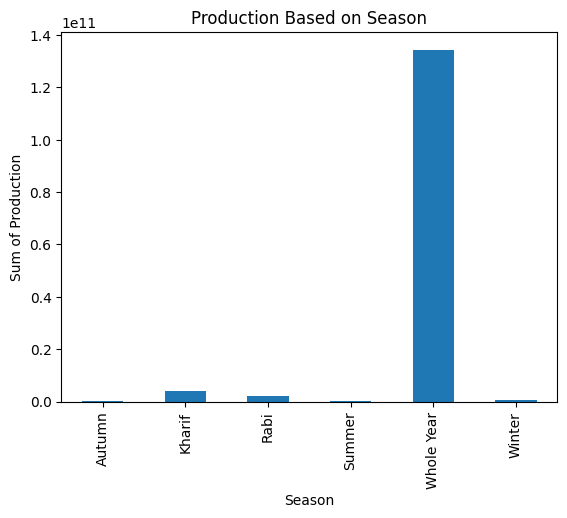

In [20]:
df.groupby('Season')['Production'].sum().plot(kind='bar')
plt.title("Production Based on Season")
plt.ylabel("Sum of Production")
plt.show()

We can see the most amout of production is done over the whole year.

<Axes: xlabel='State_Name'>

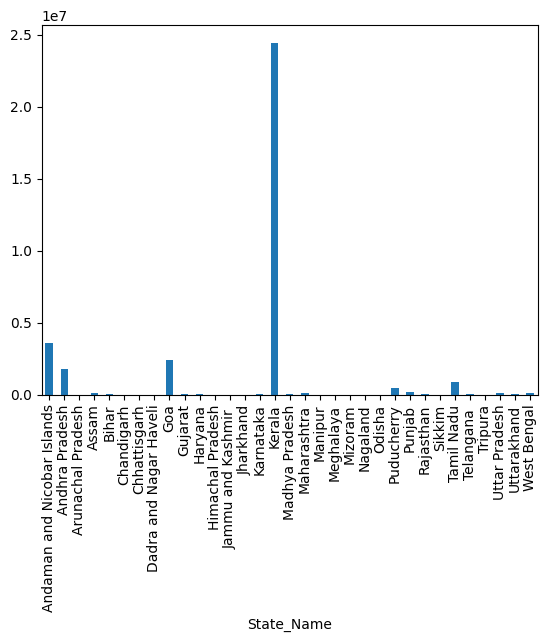

In [26]:
# Now let's check which state has the highest production rate
df.groupby('State_Name')['Production'].mean().plot(kind='bar')

* Apparantly Kerala is the state with highest production rate.
* Since kerala is the state with highest production rate let's explore more about the production in each district of kerala.

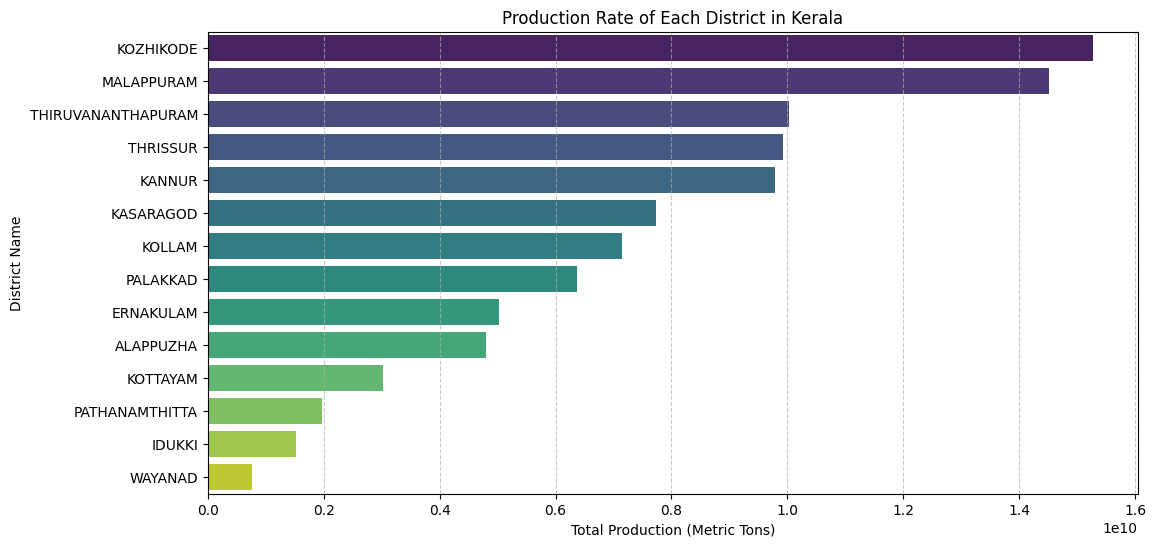

In [29]:
kerala_df = df[df['State_Name'] == 'Kerala']
kerala_production = kerala_df.groupby('District_Name')['Production'].sum().reset_index()
kerala_production = kerala_production.sort_values(by="Production", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Production", y="District_Name", data=kerala_production, palette="viridis")
plt.xlabel("Total Production (Metric Tons)")
plt.ylabel("District Name")
plt.title("Production Rate of Each District in Kerala")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

* Apparantly Kozhikode and Malappuram are the 2 best productive district of Kerala.
* Wayanad is the least productive state in the Kerala.

<Axes: xlabel='Crop'>

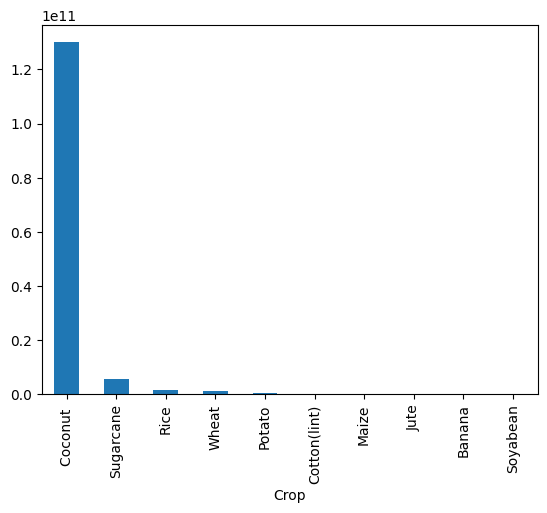

In [45]:
# Let's check top 10 crop is getting yielded the most
crop_grp = df.groupby('Crop')['Production'].sum().sort_values(ascending=False)
crop_grp.head(10).plot(kind='bar')

* These are the top 10 crop yielded in Kerala.
* Coconut is the most produced crop in Kerala.

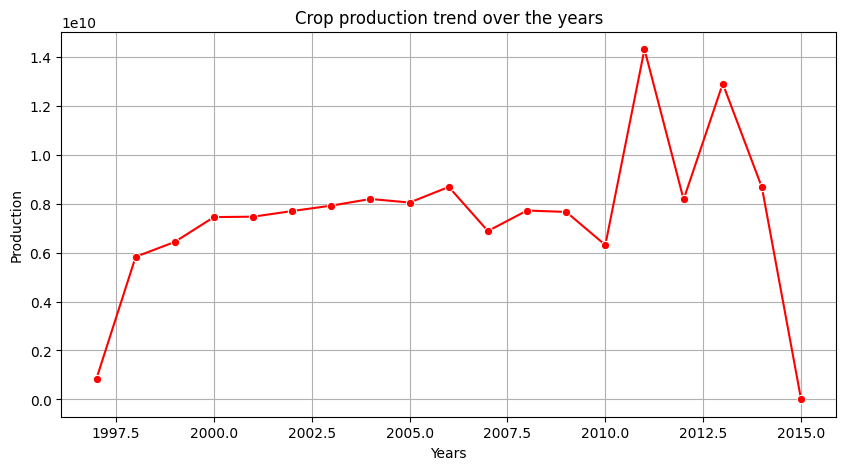

In [50]:
# Let's find the trends of production over the years
yearly_prod = df.groupby('Crop_Year')['Production'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x = 'Crop_Year', y = "Production", data = yearly_prod, marker = 'o', color = 'r')
plt.title("Crop production trend over the years")
plt.xlabel('Years')
plt.ylabel("Production")
plt.grid(True)

We can infer here:
* The Least production was done on the year 2015
* The tred suddenly spiked in the year 2011 and later we can observe some fluctuations
* Finally in the year 2015 it dropped significantly, infact lowest in the entire dataset.
* The trend was kind of stable from 1998 to 2006.

In [22]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')